<font size="+2" color="brown"><i><b><center>"With hard work, you can get fire out of a stone."</center></b></i></font>

<h2 class="list-group-item list-group-item-action active"  aria-controls="home"><center>How Much Famous CTDS Show among DATA SCIENTIST ?</center></h2>


![](http://chaitimedatascience.com/assets/images/image01.png?v80947218520951)

In [1]:
from IPython.display import Image
print("Welcome All to Chai time data science Show")
Image(url= "https://chaitimedatascience.com/content/images/2020/07/default-2.png")

Welcome All to Chai time data science Show


### Sanyam Bhutani is Machine Learning Engineer and AI Content Creator at H2O.ai  
>Linked-id :https://www.linkedin.com/in/sanyambhutani/ 

>Chai time Datasciene web link : https://sanyambhutani.com/tag/chaitimedatascience/ 

>About CTDS : Interviews with Practitioners, Kagglers & Researchers and all things Data Science

<font size="+1" color=chocolate ><b>Please appreciate me through your Upvote.</b></font>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chai-time-data-science/Anchor Thumbnail Types.csv
/kaggle/input/chai-time-data-science/Description.csv
/kaggle/input/chai-time-data-science/YouTube Thumbnail Types.csv
/kaggle/input/chai-time-data-science/Episodes.csv
/kaggle/input/chai-time-data-science/Raw Subtitles/E58.txt
/kaggle/input/chai-time-data-science/Raw Subtitles/E38.txt
/kaggle/input/chai-time-data-science/Raw Subtitles/E43.txt
/kaggle/input/chai-time-data-science/Raw Subtitles/E53.txt
/kaggle/input/chai-time-data-science/Raw Subtitles/E18.txt
/kaggle/input/chai-time-data-science/Raw Subtitles/E6.txt
/kaggle/input/chai-time-data-science/Raw Subtitles/E22.txt
/kaggle/input/chai-time-data-science/Raw Subtitles/E17.txt
/kaggle/input/chai-time-data-science/Raw Subtitles/E54.txt
/kaggle/input/chai-time-data-science/Raw Subtitles/E15.txt
/kaggle/input/chai-time-data-science/Raw Subtitles/E8.txt
/kaggle/input/chai-time-data-science/Raw Subtitles/E28.txt
/kaggle/input/chai-time-data-science/Raw Subtitles/E61.txt
/ka

<font size="+2" color="indigo"><b>Libraries Needed</b></font><br><br>


In [3]:
import plotly.express as px
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
import re
import string
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from collections import Counter
import operator
import plotly.graph_objects as go
figg = go.Figure()


<font size="+2" color="indigo"><b>Reading Files</b></font><br><br>


In [4]:
ctds_episodes = pd.read_csv('../input/chai-time-data-science/Episodes.csv',parse_dates=['recording_date','release_date'])
youtube_thumbnails = pd.read_csv('../input/chai-time-data-science/YouTube Thumbnail Types.csv')
anchor_thumbnails = pd.read_csv('../input/chai-time-data-science/Anchor Thumbnail Types.csv')
description = pd.read_csv('../input/chai-time-data-science/Description.csv')

In [5]:
youtube_thumbnails.head()

youtube_thumbnail_type                                      description  \
0                       0                            YouTube default image   
1                       1     YouTube default image with custom annotation   
2                       2       Mini Series: Custom Image with annotations   
3                       3  Custom image with CTDS branding, Title and Tags   

   youtube_default  annotation  mini_series  ctds_brand  
0                1           0            0           0  
1                1           1            0           0  
2                0           1            1           0  
3                0           1            0           1

In [6]:
anchor_thumbnails.head()

anchor_thumbnail_type                                      description  \
0                      0                   YouTube default playlist image   
1                      1                                    CTDS Branding   
2                      2       Mini Series: Custom Image with annotations   
3                      3  Custom image with CTDS branding, Title and Tags   

   same_as_youtube  title  episode_details  ctds_brand  
0                1      0                0           0  
1                1      0                0           0  
2                1      1                1           0  
3                1      1                1           1

# Chai Time Data Science Statistics

In [7]:
length = len(ctds_episodes["episode_id"])
print(f"Total number of episodes Till Now {length} Episodes")

Total number of episodes Till Now 85 Episodes


In [8]:
ctds_episodes.head()

episode_id                                       episode_name  \
0         E0         Chai Time Data Science Launch Announcement   
1         E1  Kaggle Triple Grandmaster, Abhishek Thakur Int...   
2         E2  Interview with Kaggle Master, ML Engineer: Rya...   
3         E3  Interview with CEO of SharpestMinds, Edouard H...   
4         E4  Data Science for Good: City of LA Kaggle Winni...   

            heroes heroes_gender heroes_location heroes_nationality  \
0              NaN           NaN             NaN                NaN   
1  Abhishek Thakur          Male          Norway              India   
2     Ryan Chesler          Male             USA                USA   
3   Edouard Harris          Male          Canada             Canada   
4    Shivam Bansal          Male       Singapore              India   

  heroes_kaggle_username heroes_twitter_handle  category  flavour_of_tea  \
0                    NaN                   NaN     Other     Masala Chai   
1               abhishek           abhi1thakur    Kaggle     Ginger Chai   
2                 ryches          ryan_chesler    Kaggle     Masala Chai   
3                    NaN       neutronsNeurons  Industry  Kashmiri Kahwa   
4                shivamb            shivamshaz    Kaggle  Apple Cinnamon   

  recording_date recording_time release_date  episode_duration  \
0     2019-07-15        Evening   2019-07-21               157   
1     2019-07-14        Evening   2019-07-22              2995   
2     2019-07-20      Afternoon   2019-07-26              2118   
3     2019-07-23          Night   2019-07-29              3072   
4     2019-07-14        Morning   2019-08-02              1048   

                                   youtube_url  youtube_thumbnail_type  \
0  https://www.youtube.com/watch?v=Ko_gxs42lM8                       1   
1  https://www.youtube.com/watch?v=Ezbo57Z33N8                       0   
2  https://www.youtube.com/watch?v=SJVMSKig14k                       0   
3  https://www.youtube.com/watch?v=69urmSt34Ac                       0   
4  https://www.youtube.com/watch?v=wMYX3KABHCk                       0   

   youtube_impressions  youtube_impression_views  youtube_ctr  \
0                 4433                        86         1.94   
1                25212                       845         3.35   
2                 3282                        84         2.56   
3                 2376                        38         1.60   
4                 3884                       116         2.99   

   youtube_nonimpression_views  youtube_views  youtube_watch_hours  \
0                           45            131                    3   
1                          683           1528                  142   
2                           44            128                   14   
3                           57             95                   11   
4                           36            152                    9   

   youtube_avg_watch_duration  youtube_likes  youtube_dislikes  \
0                          82              4                 0   
1                         335             55                 0   
2                         394              7                 0   
3                         417              2                 0   
4                         213              4                 0   

   youtube_comments  youtube_subscribers  \
0                 2                    3   
1                 5                   60   
2                 1                    3   
3                 0                    1   
4                 0                    4   

                                          anchor_url  anchor_thumbnail_type  \
0  https://anchor.fm/chaitimedatascience/episodes...                    0.0   
1  https://anchor.fm/chaitimedatascience/episodes...                    0.0   
2  https://anchor.fm/chaitimedatascience/episodes...                    0.0   
3  https://anchor.fm/chaitimedatascience/episodes...                    0.0   
4  h

<font size="+2" color="indigo"><b>Finding Sanyam Bhutani Birthday</b></font><br><br>


In [9]:
birthday_episode = ctds_episodes[ctds_episodes["heroes"].isnull()]
birthday_episode

episode_id                                       episode_name heroes  \
0          E0         Chai Time Data Science Launch Announcement    NaN   
46         M0  00 Introduction & About: fast.ai 2019 & Things...    NaN   
47         M1  01: Lesson-1 Image Classification | fast.ai 20...    NaN   
48         M2  02: Lesson-2 Production & SGD From Scratch | f...    NaN   
49         M3  03: Lesson-3 Multi-label; SGD from scratch | f...    NaN   
50         M4  04: Lesson-4 NLP:Tabular Data; Recsys | fast.a...    NaN   
51         M5  05: Lesson 5: Backprop; Neural Nets from scrat...    NaN   
52         M6  06: Lesson-6 CNN Deep Dive; Ethics | fast.ai 2...    NaN   
53         M7  07: Lesson-7 ResNet; U-Net; GANs | fast.ai 201...    NaN   
54         M8  08: Where to go from here, General fast.ai advice    NaN   
78        E69  Birthday Special AMA: Answering Questions from...    NaN   

   heroes_gender heroes_location heroes_nationality heroes_kaggle_username  \
0            NaN             NaN                NaN                    NaN   
46           NaN             NaN                NaN                    NaN   
47           NaN             NaN                NaN                    NaN   
48           NaN             NaN                NaN                    NaN   
49           NaN             NaN                NaN                    NaN   
50           NaN             NaN                NaN                    NaN   
51           NaN             NaN                NaN                    NaN   
52           NaN             NaN                NaN                    NaN   
53           NaN             NaN                NaN                    NaN   
54           NaN             NaN                NaN                    NaN   
78           NaN             NaN                NaN                    NaN   

   heroes_twitter_handle category   flavour_of_tea recording_date  \
0                    NaN    Other      Masala Chai     2019-07-15   
46                   NaN    Other  Kesar Rose Chai     2020-02-26   
47                   NaN    Other  Kesar Rose Chai     2020-02-26   
48                   NaN    Other  Kesar Rose Chai     2020-02-26   
49                   NaN    Other  Kesar Rose Chai     2020-02-26   
50                   NaN    Other  Kesar Rose Chai     2020-02-26   
51                   NaN    Other  Kesar Rose Chai     2020-02-26   
52                   NaN    Other  Kesar Rose Chai     2020-02-26   
53                   NaN    Other  Kesar Rose Chai     2020-02-26   
54                   NaN    Other  Kesar Rose Chai     2020-02-26   
78                   NaN    Other      Masala Chai     2020-05-27   

   recording_time release_date  episode_duration  \
0         Evening   2019-07-21               157   
46          Night   2020-03-07               624   
47          Night   2020-03-07               341   
48          Night   2020-03-07               316   
49          Night   2020-03-07               332   
50          Night   2020-03-07               281   
51          Night   2020-03-07               311   
52          Night   2020-03-07               412   
53          Night   2020-03-07               467   
54          Night   2020-03-07               605   
78        Morning   2020-05-27              3984   

                                    youtube_url  youtube_thumbnail_type  \
0   https://www.youtube.com/watch?v=Ko_gxs42lM8                       1   
46  https://www.youtube.com/watch?v=rzuIkj8lymc                       2   
47  https://www.youtube.com/watch?v=RKtfgXz7Qo0                       2   
48  https://www.youtube.com/watch?v=ahdybq2V-38                       2   
49  https://www.youtube.com/watch?v=Z-waVKLcLJE                       2   
50  https://www.youtube.com/watch?v=5CW3QdGdr8c                       2   
51  https://www.youtube.com/watch?v=RIGlXwvUo_Q                       2   
52  https://www.youtube.com/watch?v=nAE8tq_SIXo                       2   
53  https://www.youtube.com/watch?v=

#### Found Sanyam Bhutani Birthday Date : 27-05-2020
#### How i found  Birthday Date of **sanyam Bhutani**,Initially all the rows were selected which has only NaN values in them. Basically the show is all about interview with ML Heroes. First episode was announcement about CTDS and no ML hero was interviewed. Some Tutorail about FAST AI so there is no chance for interviewing with ML heroes, atlast there were only one episode which has no ML heroes so that will be your Birthday special or any special occurance and Titled as **Birthday Special AMA: Answering Questions from my ML Heroes | CTDS.News Launch**

#### On the same date the recording date and released date was **same**, and Sanyam used **Masala Chai** in announcement day of CTDS as well as on his birthday episode

###### These are my assumptions

In [10]:
birthday = ctds_episodes[ctds_episodes["episode_id"]=="E69"]
birthday

episode_id                                       episode_name heroes  \
78        E69  Birthday Special AMA: Answering Questions from...    NaN   

   heroes_gender heroes_location heroes_nationality heroes_kaggle_username  \
78           NaN             NaN                NaN                    NaN   

   heroes_twitter_handle category flavour_of_tea recording_date  \
78                   NaN    Other    Masala Chai     2020-05-27   

   recording_time release_date  episode_duration  \
78        Morning   2020-05-27              3984   

                                    youtube_url  youtube_thumbnail_type  \
78  https://www.youtube.com/watch?v=hyJhwWshfbY                       3   

    youtube_impressions  youtube_impression_views  youtube_ctr  \
78                 3698                       163         4.41   

    youtube_nonimpression_views  youtube_views  youtube_watch_hours  \
78                          338            501                   55   

    youtube_avg_watch_duration  youtube_likes  youtube_dislikes  \
78                         395             36                 1   

    youtube_comments  youtube_subscribers  \
78                 3                   15   

                                           anchor_url  anchor_thumbnail_type  \
78  https://anchor.fm/chaitimedatascience/episodes...                    3.0   

    anchor_plays  spotify_starts  spotify_streams  spotify_listeners  \
78         342.0            24.0             16.0               16.0   

    apple_listeners  apple_listened_hours  apple_avg_listen_duration  
78             17.0                   9.0                     1992.0

In [11]:
ctds_episodes["heroes_gender"].value_counts()

Male      65
Female     9
Name: heroes_gender, dtype: int64

<font size="+2" color="indigo"><b>Geneder Distribution</b></font><br><br>

In [12]:
gender = ctds_episodes["heroes_gender"].value_counts()
gender_df = pd.DataFrame({"gender":gender.index,"frequency":gender.values})
fig = px.bar(data_frame=gender_df,x="gender",y="frequency",title="Gender Distribution",color="gender",height=500,width=1000)
fig.show()

Data Science is a growing field and over the past few years it has seen exponential growth. Men and Women have contributed equally to this field. By looking at the below plot, it would seem like that there's a gender bias as 88% of the heroes interviewed are males, but I believe it is just a matter of time that we see a rise in the red bar.
## Most of the persons interviewed in CTDS belongs to male category which above 90 percent

 <font size="+2" color="indigo"><b>Most loved Flavour of Chai</b></font><br><br>

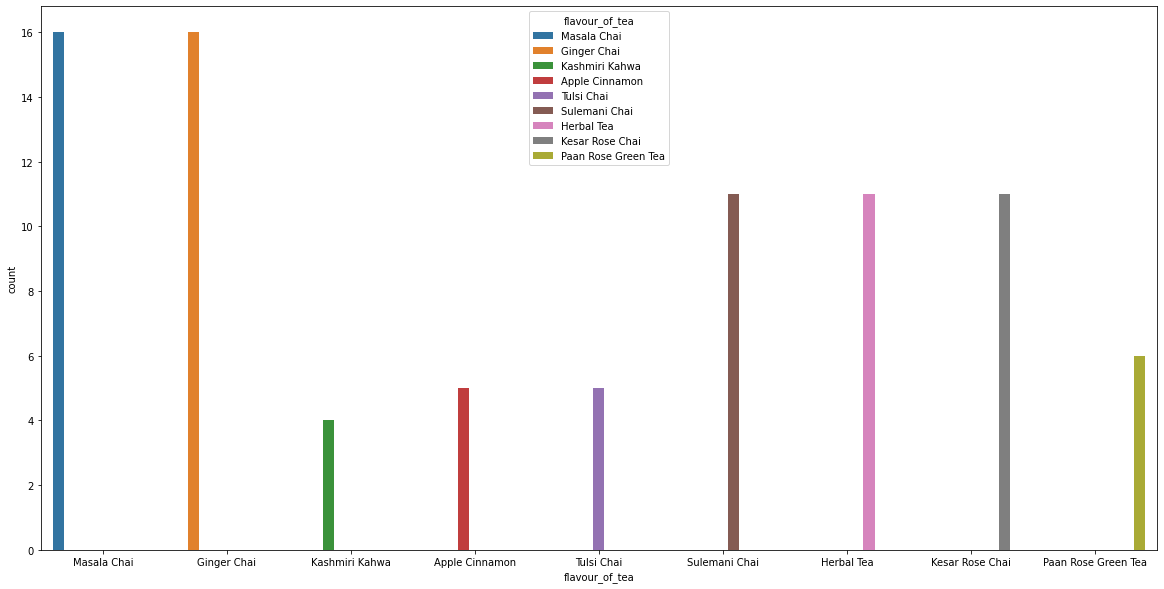

In [13]:
rcParams["figure.figsize"] = 20,10
sns.countplot(x = ctds_episodes["flavour_of_tea"],hue=ctds_episodes["flavour_of_tea"])

In [14]:
temp_data = Counter(ctds_episodes["flavour_of_tea"])
sorted_d = dict(sorted(temp_data.items(), key=operator.itemgetter(1),reverse=True))


In [15]:
fig = px.funnel_area(names = list(sorted_d.keys()),values = list(sorted_d.values()),title="Chai Consumed by Host duirng the interviews") 
fig.show()

Apparently, the host Sanyam chooses from his collection of 9 different varieties of chai, which he keeps aside him while interviewing. So, let's see which varieties have been used the most and which the least.

It states clearly that **Masala Chai** and **Ginger chai** is mostloved by the sanyam with **Kashmiri Kahwa** and **tulsi Chai** are least preferred one

In [16]:

#  <font size="+2" color="indigo"><b>Flavour of Chai VS ML heores</b></font><br><br>
# rcParams["figure.figsize"] = 20,10
# sns.countplot(x = ctds_episodes["flavour_of_tea"],hue=ctds_episodes["heroes_gender"])



#  <font size="+2" color="indigo"><b>falvour of Chai VS Category Vs ML Heores</b></font><br><br>
# fig = px.bar(data_frame=ctds_episodes,x ="flavour_of_tea",color="category",title="Favourite Chai based on there Category")
# fig.show()
## From the above image we can conclude that most of the ML Heores loves Masala chai and Ginger Chai very much 

# <font size="+2" color="indigo"><b>Flavour of chai VS Gender of ML Heroes</b></font><br><br>
# rcParams["figure.figsize"] = 25,10
# sns.countplot(x = ctds_episodes["heroes_gender"],hue=ctds_episodes["flavour_of_tea"])



#  <font size="+2" color="indigo"><b>Flavour of chai Baased on ML Heroes Nationality </b></font><br><br>
# fig = px.bar(data_frame=ctds_episodes,x ="heroes_nationality",color="flavour_of_tea",title = "Flavour of chai Based on ML Heroes Nationality")
# fig.show()
## People from USA used to like and have almost all the flavour of chai

 <font size="+2" color="indigo"><b>Recording Time Distribution</b></font><br><br>

In [17]:
time = ctds_episodes["recording_time"].value_counts()
time_df = pd.DataFrame({"time":time.index,"frequency":time.values})
fig = px.bar(data_frame=time_df,x="time",y="frequency",title="Recording Time Distribution",color="time")
fig.show()

**Why Most of the interviews are in NightTime**
##### Since most of the ML Heroes are in the different time zone ,Most of the interviews are hapenning in the NightTime

<font size="+2" color="indigo"><b>Flavour of chai vs Time of Recording </b></font><br><br>

In [18]:
fig = px.bar(data_frame=ctds_episodes,x ="flavour_of_tea",y="recording_time",color="recording_time",title = "Chai Consumed by Bhutani Based on Recording Time")
fig.show()

Chai sometimes makes you feel energetic , it gives you some **freshness** after drinking . 
Since most of the ML Heroes are from different country so the interview will happen at different time zone.
Sometime to control our sleepiness are over tired feeling most of the indian People drink Chai(Tea) to get rid of that tired or sleepiness.
So the host consumes 
> Masala Chai at Morning 

> Kesar Rose Chai

<font size="+2" color="indigo"><b>ML heores category distribution</b></font><br><br>

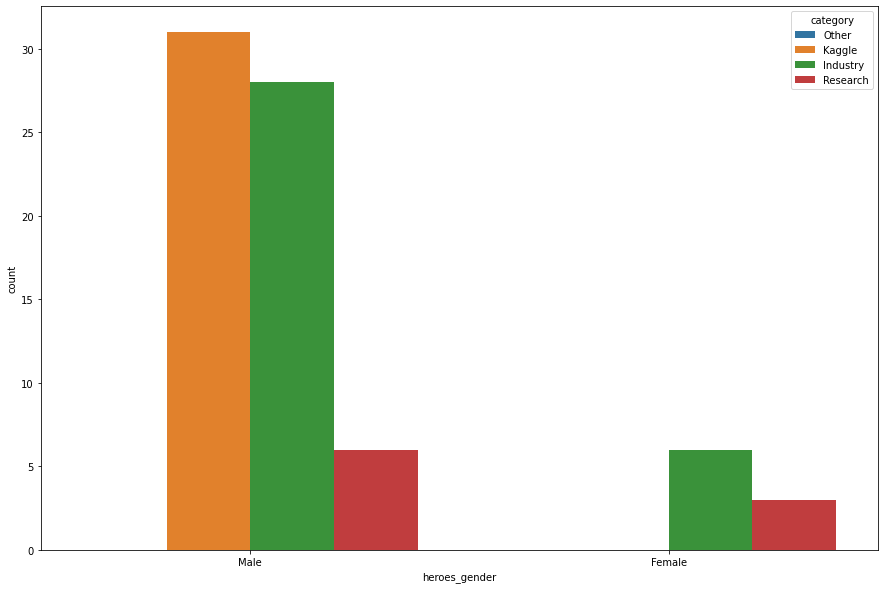

In [19]:
rcParams["figure.figsize"] = 15,10
sns.countplot(x = ctds_episodes["heroes_gender"],hue = ctds_episodes["category"])

## Most of the male Heores are from Kaggle and Industry and very less in research and Most of the Female are form Industry and Research and Intrestingly none of them are form ***Other*** Category

 <font size="+2" color="indigo"><b>Heores with More subscribers</b></font><br><br>

In [20]:
subscriber = ctds_episodes.sort_values(by="youtube_subscribers",ascending=False)

In [21]:
rcParams["figure.figsize"] = 20,10
px.bar(x="heroes",y="youtube_subscribers",data_frame=subscriber[:10],title="Which ML Hero Helped more to gain high subscirber")

#### Interview with **Jeremy Howard** has helped CTDS Show to gain  more number of subscribers then **Parul Pandey** and **Abhisheak Thakur**

In [22]:
fig = px.line(data_frame=ctds_episodes,x ="episode_id",y="youtube_subscribers",title="Growth Rate of Subscriber based on each Episode")
fig.show()

#### This graph says that after the release of Episode 27 , the subscriber count has reached it peak of 139 Subscribers , ***Keep in Mind about Episode 27*** will check about that later 
#### I have a doubt ! is the episode 27 is from Jeremy howard ? bcz he is the one who helped CTDS to boost the subscriber Count

<font size="+2" color="indigo"><b>ML Heores Location Distribution</b></font><br><br>

In [23]:
labels = ctds_episodes['heroes_nationality'].value_counts()[:10].index
values = ctds_episodes['heroes_nationality'].value_counts()[:10].values
country = dict(ctds_episodes['heroes_nationality'].value_counts()[:10])
hover_values =list(country.keys()) 
fig = px.pie(values=values,labels=labels,title="Distribution of people from different locations",hover_name=hover_values)
fig.show()

##### Most of the people are form USA and France thats why most of the interview are Hapenning at night Time , as the Time zone varies from India to other conuntry

<font size="+2" color="indigo"><b>Ml Heores Present Location at present at Map View</b></font><br><br>

In [24]:
fig = px.choropleth(ctds_episodes,locations="heroes_location",locationmode="country names",hover_name="heroes",title="ML heores Present Location")
fig.show()

<font size="+2" color="indigo"><b>Ml Hores Original Nationality in Map View</b></font><br><br>

In [25]:
fig = px.choropleth(ctds_episodes,locations="heroes_nationality",locationmode="country names",hover_name="heroes",title="ML Heroes Nationality")
fig.show()

 <font size="+2" color="indigo"><b>Recording time Based on ML Heores Categoty</b></font><br><br>

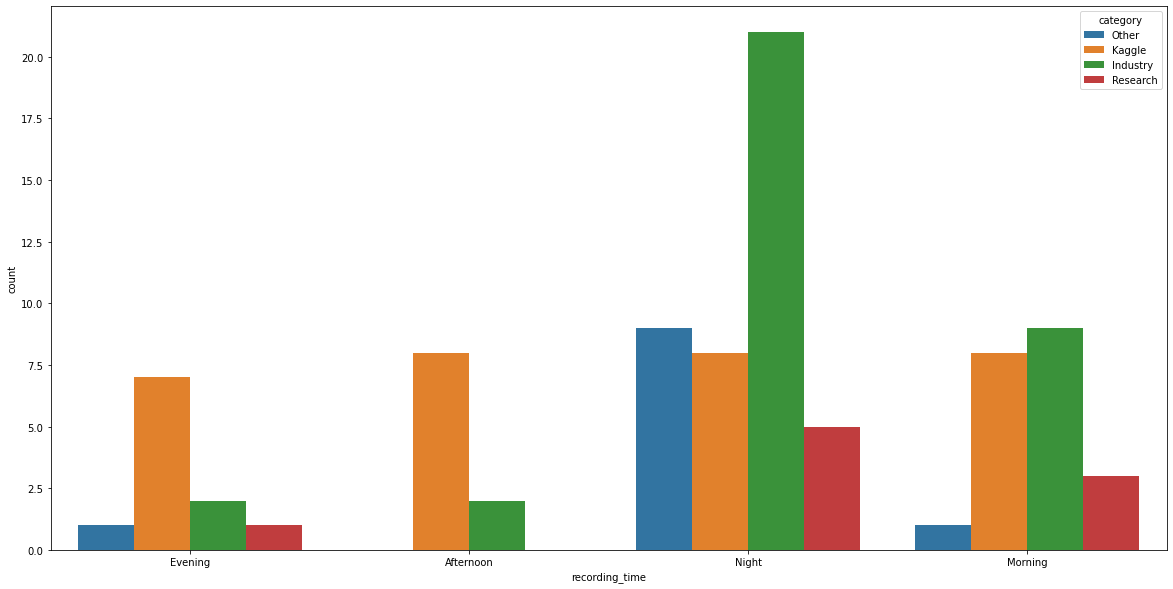

In [26]:
sns.countplot(ctds_episodes["recording_time"],hue=ctds_episodes["category"])

 <font size="+2" color="indigo"><b>Episode Duration for each Episode</b></font><br><br>

In [27]:
fig = px.area(ctds_episodes,y = "episode_duration",x = "episode_id",title="Eposide Duration for each episode")
fig.show()

##### From the above graph we cannot able to see any steady pattern in episode Duration , If the session goes well they will go for even long time

In [28]:
ctds_episodes["differenceDate"] = ctds_episodes["release_date"]-ctds_episodes["recording_date"] 

In [29]:
fig = px.line(ctds_episodes,y="differenceDate",title = "episode release data difference")
fig.show()

 <font size="+2" color="indigo"><b>Audio Streaming Platforms</b></font><br><br>

 <font size="+2" color="indigo"><b>ML Heores starts on Spotify</b></font><br><br>

In [30]:
spotify_star = ctds_episodes.sort_values(by="spotify_starts",ascending=False)
px.bar(data_frame=spotify_star[:15],x="heroes",y="spotify_starts",title="ML heores Starts on spotify")

### These persons podcast has more starts in spotify and **Abhishek thakur** is in the leading number of starts in Spotify

 <font size="+2" color="indigo"><b>ML Heores Popularity based on Anchor Plays</b></font><br><br>

In [31]:
anchorplays = ctds_episodes.sort_values(by="anchor_plays",ascending=True)

In [32]:
px.bar(data_frame=anchorplays,x="anchor_plays",y="heroes",orientation="h",color="anchor_plays")

 <font size="+2" color="indigo"><b></b></font><br><br>

 <font size="+2" color="indigo"><b>ML Liked Videos Based on ML Heores</b></font><br><br>

In [33]:
most_liked = ctds_episodes.sort_values(by="youtube_likes",ascending=True)

In [34]:
px.bar(data_frame=most_liked,x="youtube_likes",y="heroes",orientation="h",color="youtube_likes",title="MOST LIKED VIDEOS OF ML HEROS")

### These are the most videos ML Heros interviewed by Sanyam in his CTDS show

 <font size="+2" color="indigo"><b>Youtube Views VS Episode Duration</b></font><br><br>

In [35]:
fig = px.histogram(data_frame=ctds_episodes,x="episode_duration",y="youtube_impression_views",histnorm="percent",title="Youtube Views VS Episode Duration")
fig.show()

 <font size="+2" color="indigo"><b>Youtube Impression Based on ML Heores</b></font><br><br>

In [36]:
fig = px.histogram(data_frame=ctds_episodes.sort_values(by="youtube_impressions",ascending=False),x="heroes",y="youtube_impressions",title="Youtube Impression VS ML Heores")
fig.show()

 <font size="+2" color="indigo"><b>Count of DiskLikes Videos </b></font><br><br>

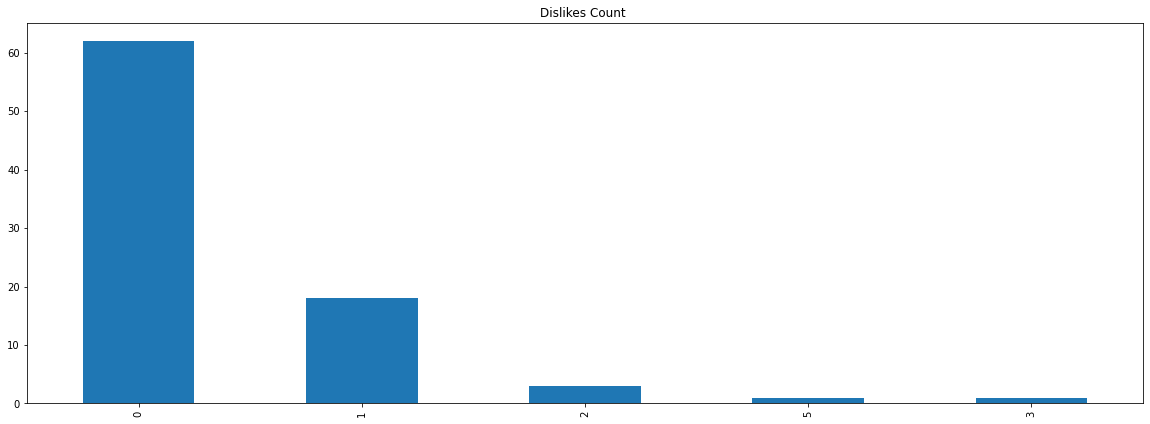

In [37]:
rcParams["figure.figsize"] = 20,7
ctds_episodes["youtube_dislikes"].value_counts().plot(kind="bar",title="Dislikes Count ")

### Have very less number of dislikes 

 <font size="+2" color="indigo"><b>Click Through Rate Based on ML Heores Category</b></font><br><br>

In [38]:
fig = px.line(data_frame=ctds_episodes,x ="episode_id",y="youtube_ctr",line_group="category",color="category")
fig.show()

### Youtube click through rate is highly depends on multiple factors,Here it mainly depends on the categoty of ML Heroes

In [39]:
dislike = ctds_episodes[ctds_episodes["youtube_dislikes"]>1]
dislike["data_difference"] = dislike["release_date"]-dislike["recording_date"]

In [40]:
dislike["data_difference"]

27   20 days
31   49 days
44   10 days
58   22 days
60   45 days
Name: data_difference, dtype: timedelta64[ns]

 <font size="+2" color="indigo"><b>Thumbnail type stats</b></font><br><br>

In [41]:
ctr = ctds_episodes[["youtube_thumbnail_type","youtube_impressions","youtube_impression_views","youtube_ctr","youtube_nonimpression_views"]]

In [42]:
temp = ctr.groupby(["youtube_thumbnail_type"]).sum()

In [43]:
temp.head()

youtube_impressions  youtube_impression_views  \
youtube_thumbnail_type                                                  
0                                    380725                     10816   
1                                     66221                      1837   
2                                     27226                       587   
3                                     75253                      2222   

                        youtube_ctr  youtube_nonimpression_views  
youtube_thumbnail_type                                            
0                            128.27                        19818  
1                             27.25                         3883  
2                             17.72                          381  
3                             49.84                         4072

In [44]:
fig = go.Figure()
PLOT_BGCOLOR='#99ff66'
fig.add_trace(go.Indicator(
    title = 'YT Impression Thumbnail type 0',
    mode = "number",
    value = temp.youtube_impressions[0],
    domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    title = "YT Impression Thumbnail type 1",
    mode = "number",
    value = temp.youtube_impressions[1],
    domain = {'row': 0, 'column': 1}))


fig.add_trace(go.Indicator(
    title = 'YT Impression Thumbnail type 2',
    mode = "number",
    value = temp.youtube_impressions[2],
    domain = {'row': 0, 'column': 2}))

fig.add_trace(go.Indicator(
    title = 'YT Impression Thumbnail type 3',
    mode = "number",
    value = temp.youtube_impressions[3],
    domain = {'row': 0, 'column': 3}))

# Row 2 Starts from here

fig.add_trace(go.Indicator(
    title = 'CTR Thumbnail type 0',
    mode = "number",
    value = temp.youtube_ctr[0],
    domain = {'row': 1, 'column': 0}))

fig.add_trace(go.Indicator(
    title = "CTR Thumbnail type 1",
    mode = "number",
    value = temp.youtube_ctr[1],
    domain = {'row': 1, 'column': 1}))


fig.add_trace(go.Indicator(
    title = 'CTR Thubmnail type 2',
    mode = "number",
    value = temp.youtube_ctr[2],
    domain = {'row': 1, 'column': 2}))

fig.add_trace(go.Indicator(
    title = 'CTR Thubnail type 3',
    mode = "number",
    value = temp.youtube_ctr[3],
    domain = {'row': 1, 'column': 3}))

fig.update_layout(title='<b>Click Through Rate  and Youtube Impression based on  Thumbnail Type</b>',
                  template='seaborn',
                  grid = {'rows': 2, 'columns': 4, 'pattern': "independent"},paper_bgcolor=PLOT_BGCOLOR)

#### Thumbnail type 0 and 3 has more impression on youtube and Click through rate

 <font size="+2" color="indigo"><b>Audio Streaming Platform Distribution</b></font><br><br>

In [45]:
tot_audio = ctds_episodes['anchor_plays'].sum()
spotify_total = ctds_episodes['spotify_starts'].sum()
apple_total = ctds_episodes['apple_listeners'].sum()

In [46]:
fig = px.pie(labels=['Spotify','Apple Podcast','Others'],
                             values=[spotify_total, apple_total,tot_audio-(spotify_total+apple_total)],hover_name=['Spotify','Apple Podcast','Others'],title = "Podcast Streaming Platforms")
fig.show()

In [47]:
fig = px.line(data_frame=ctds_episodes,x="release_date",y="anchor_plays")
fig.show()

In [48]:
fig = px.line(data_frame=ctds_episodes,x="release_date",y="spotify_streams")
fig.show()

In [49]:
fig = px.line(data_frame=ctds_episodes,x="release_date",y="spotify_listeners")
fig.show()

#### Initially there were more spotify listeners but later on time spotify listeners were decreased , will what is the reason behind that down of listeners
#### I don't think 2020 is not the year for Podcast with ML Heroes

In [50]:
fig = px.line(data_frame=ctds_episodes,x="release_date",y="youtube_impressions",color="category")
fig.show()

#### Most watched videos in youtube are from industry ML Heroes

In [51]:
fig = px.line(data_frame=ctds_episodes,x="episode_id",y="spotify_streams",line_group="category",color="category")
fig.show()

In [52]:
fig = px.line(data_frame=ctds_episodes,x="episode_id",y="spotify_listeners",line_group="category",color="category")
fig.show()

 <font size="+2" color="indigo"><b>Over Spotify Comparison</b></font><br><br>

In [53]:
figg.add_trace(go.Scatter(x = ctds_episodes["episode_id"], y = ctds_episodes["spotify_starts"],name="spotify_starts"))
figg.add_trace(go.Scatter(x = ctds_episodes["episode_id"], y = ctds_episodes["spotify_streams"],name="spotify_streams"))
figg.add_trace(go.Scatter(x = ctds_episodes["episode_id"], y = ctds_episodes["spotify_listeners"], name="spotify_listeners"))
figg.update_layout(title='Overall Spotify Comparison for each Episode',
                   xaxis_title='Episode',
                   yaxis_title='Count')
figg.show()

 <font size="+2" color="indigo"><b>Apple Devices</b></font><br><br>

In [54]:
fig = px.line(data_frame=ctds_episodes,x="episode_id",y="apple_listened_hours",line_group="category",color="category",title="Apple listened hours")
fig.show()

In [55]:

fig = px.line(data_frame=ctds_episodes,x="episode_id",y="apple_avg_listen_duration",line_group="category",color="category")
fig.show()

In [56]:
fig = px.line(data_frame=ctds_episodes,x="episode_id",y="apple_listeners",line_group="category",color="category")
fig.show()

 <font size="+2" color="indigo"><b>Text Data Visualizations</b></font><br><br>

In [57]:
description.head()

episode_id                                        description
0         E0  Interview with ML Hero Series: https://medium....
1         E1  In the first Episode, Sanyam Bhutani interview...
2         E2  Audio Version Available here: https://anchor.f...
3         E3  Audio Version available here: https://anchor.f...
4         E4  In this Conversation, Sanyam Bhutani interview...

In [58]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [59]:
description["description"] = description["description"].apply(clean_text)

In [60]:
def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

In [61]:
description["description"] = description["description"].apply(text_preprocessing)

In [62]:
description.head()

episode_id                                        description
0         E0  interview ml hero series show interviews pract...
1         E1  first episode sanyam bhutani interviews kaggle...
2         E2  audio version available episode sanyam bhutani...
3         E3  audio version available super excited share am...
4         E4  conversation sanyam bhutani interviews shivam ...

In [63]:
description['temp_list'] = description['description'].apply(lambda x:str(x).split())
top = Counter([item for sublist in description['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')


In [64]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Description', orientation='h', width=700, height=700,color='Common_words')
fig.show()

In [65]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [66]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

 <font size="+2" color="indigo"><b>Word Cloud Representation of text in description</b></font><br><br>

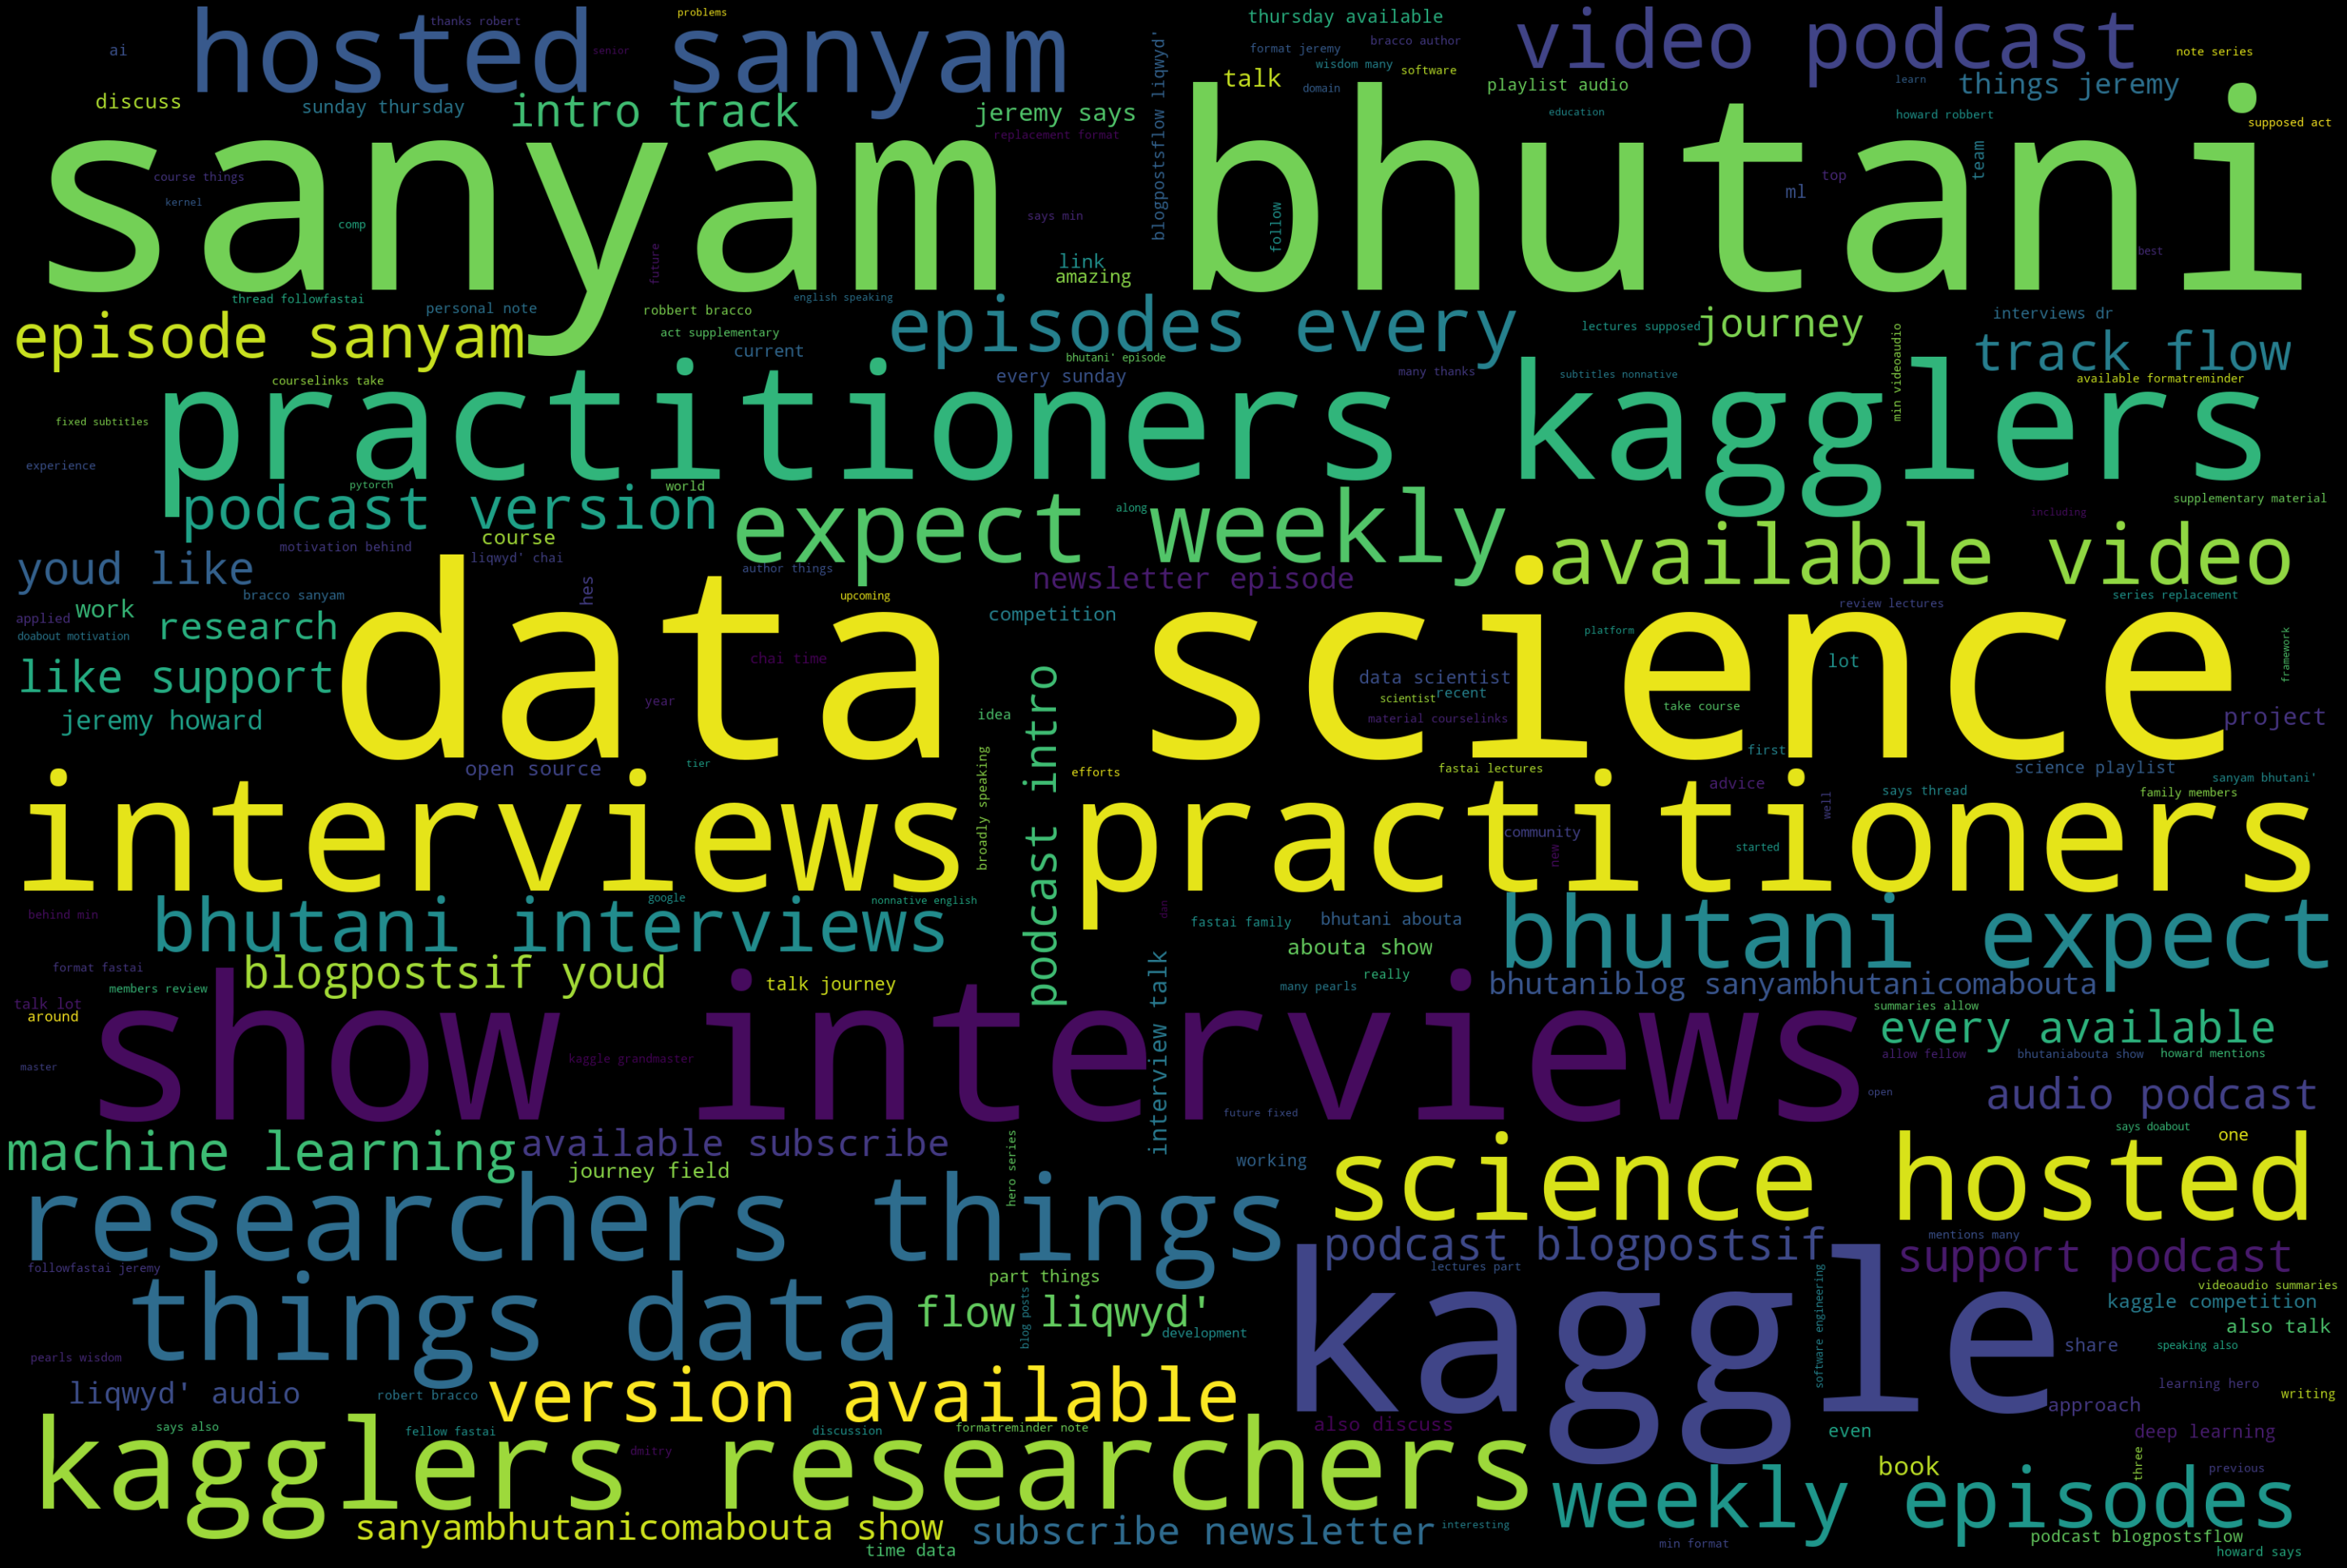

In [67]:
description_text = description.description[:100].values
generate_word_cloud(description_text)


In [68]:
most_viewed = ctds_episodes.sort_values(by="youtube_views",ascending=False)

In [69]:
E_27 = pd.read_csv("/kaggle/input/chai-time-data-science/Cleaned Subtitles/E27.csv")
E_27.head()

Time         Speaker                                               Text
0  0:13  Sanyam Bhutani  Hey, this is Sanyam Bhutani and you're listeni...
1  2:37   Jeremy Howard                           Thank you for having me.
2  2:40  Sanyam Bhutani  So I think you've had one of the most unique p...
3  2:57   Jeremy Howard  I did not study programming I studied philosop...
4  3:03  Sanyam Bhutani  So I did time you also started working at McKi...

In [70]:
san = E_27[E_27["Speaker"]=="Sanyam Bhutani"]
jer = E_27[E_27["Speaker"]=="Jeremy Howard"]

 <font size="+2" color="indigo"><b>What Jeremy Howard Speaks</b></font><br><br>

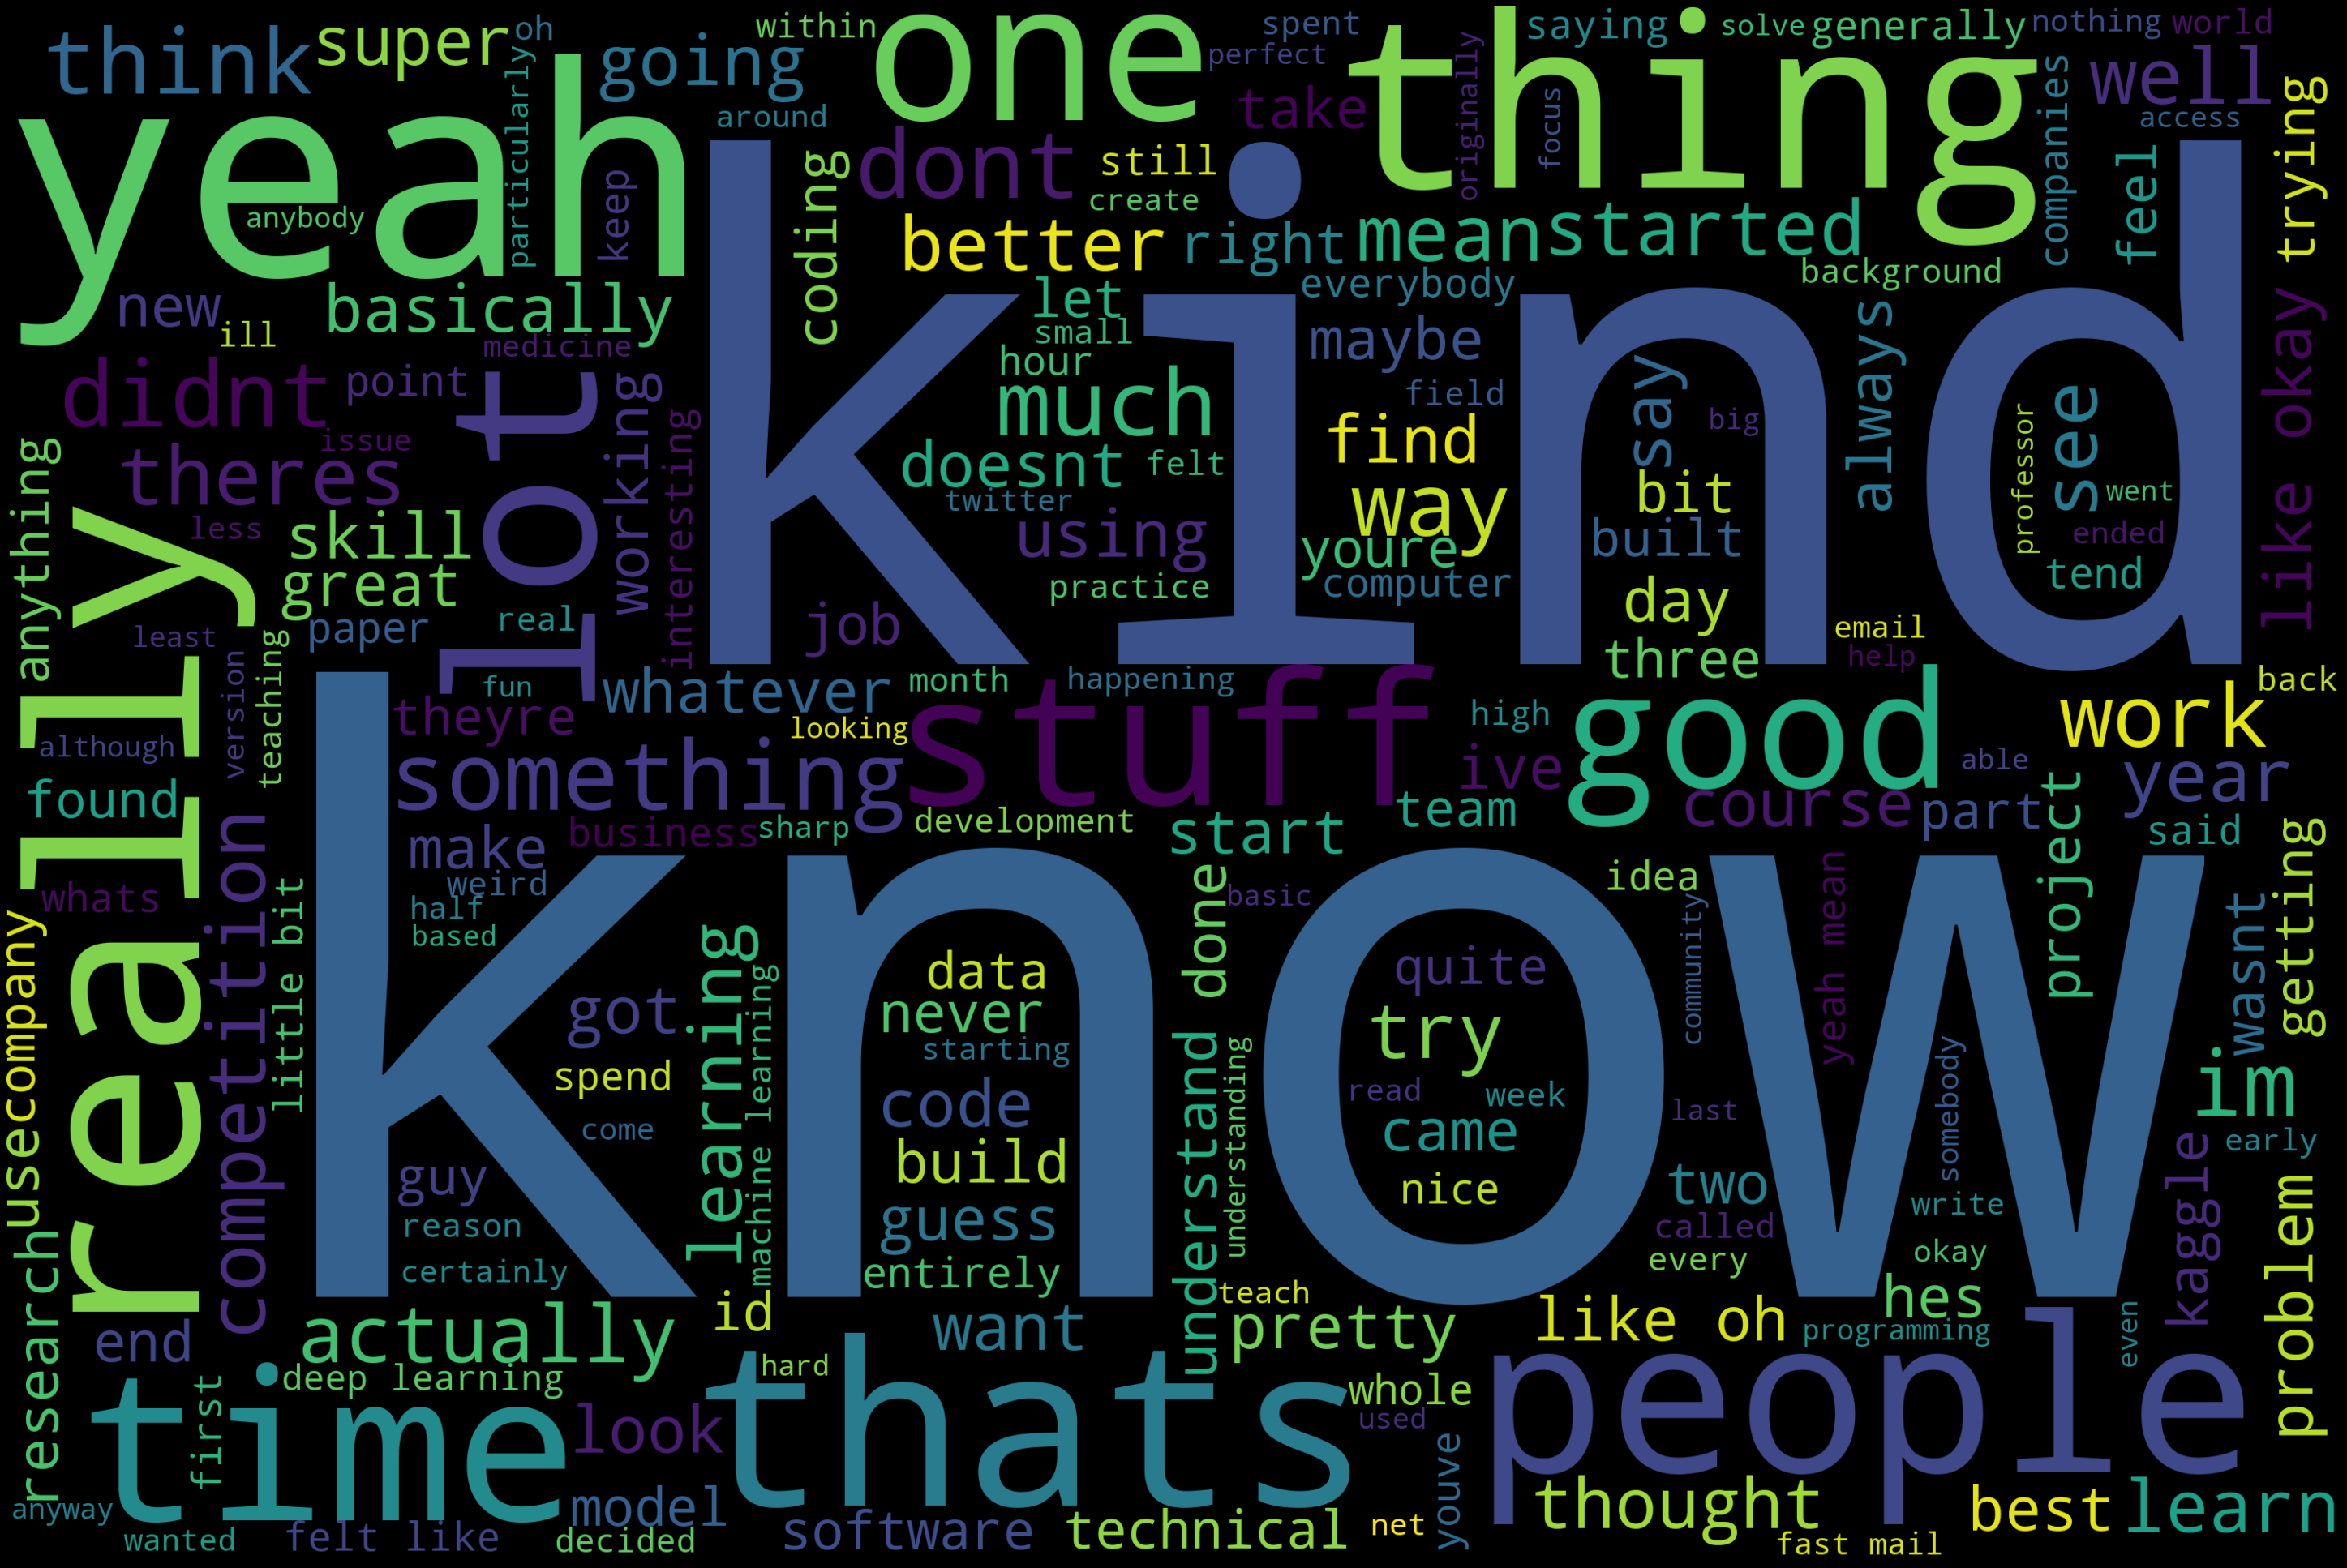

In [71]:
jer["Text"] = jer["Text"].apply(text_preprocessing)
generate_word_cloud(jer.Text.values)

No worries.This is not the end of kernel.**I have updated this kernel with few more functions (Now version 17 is live)**.Going forward i will add more insights in upcoming versions.I would like to get appreciation from you with an 👍 .Please <font size="+1" color="red"><b>Upvote</b></font> and keep it in your favourite list.

Thanks for your patience.


*Happy Kaggling!!!*.
